In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [300]:
df = pd.read_csv("train.csv")
df.shape

(1460, 81)

In [89]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [107]:
for x in range(len(df.isnull().any())):
    if df.isnull().any()[x] == True:
        print(df.isnull().any().index.tolist()[x])

In [91]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan,np.round(df['LotFrontage'].mean()))
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].value_counts().index[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(np.round(df['MasVnrArea'].mean()))
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().index[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].value_counts().index[0])

In [92]:
df = df.fillna("Zero")

In [105]:
o_list=[]
for x in df.columns.tolist():
    if df[x].dtype == "O":
        o_list.append(x)
        
print(o_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [109]:
for x in o_list:
    df[x] = LabelEncoder().fit_transform(df[x])

In [112]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [113]:
for x in df.columns.tolist():
    if df[x].dtype == "O":
        print(x)

In [274]:
x = df.drop(columns = ['Id',"SalePrice"])
y = df['SalePrice']

In [117]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4


In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state= 43)

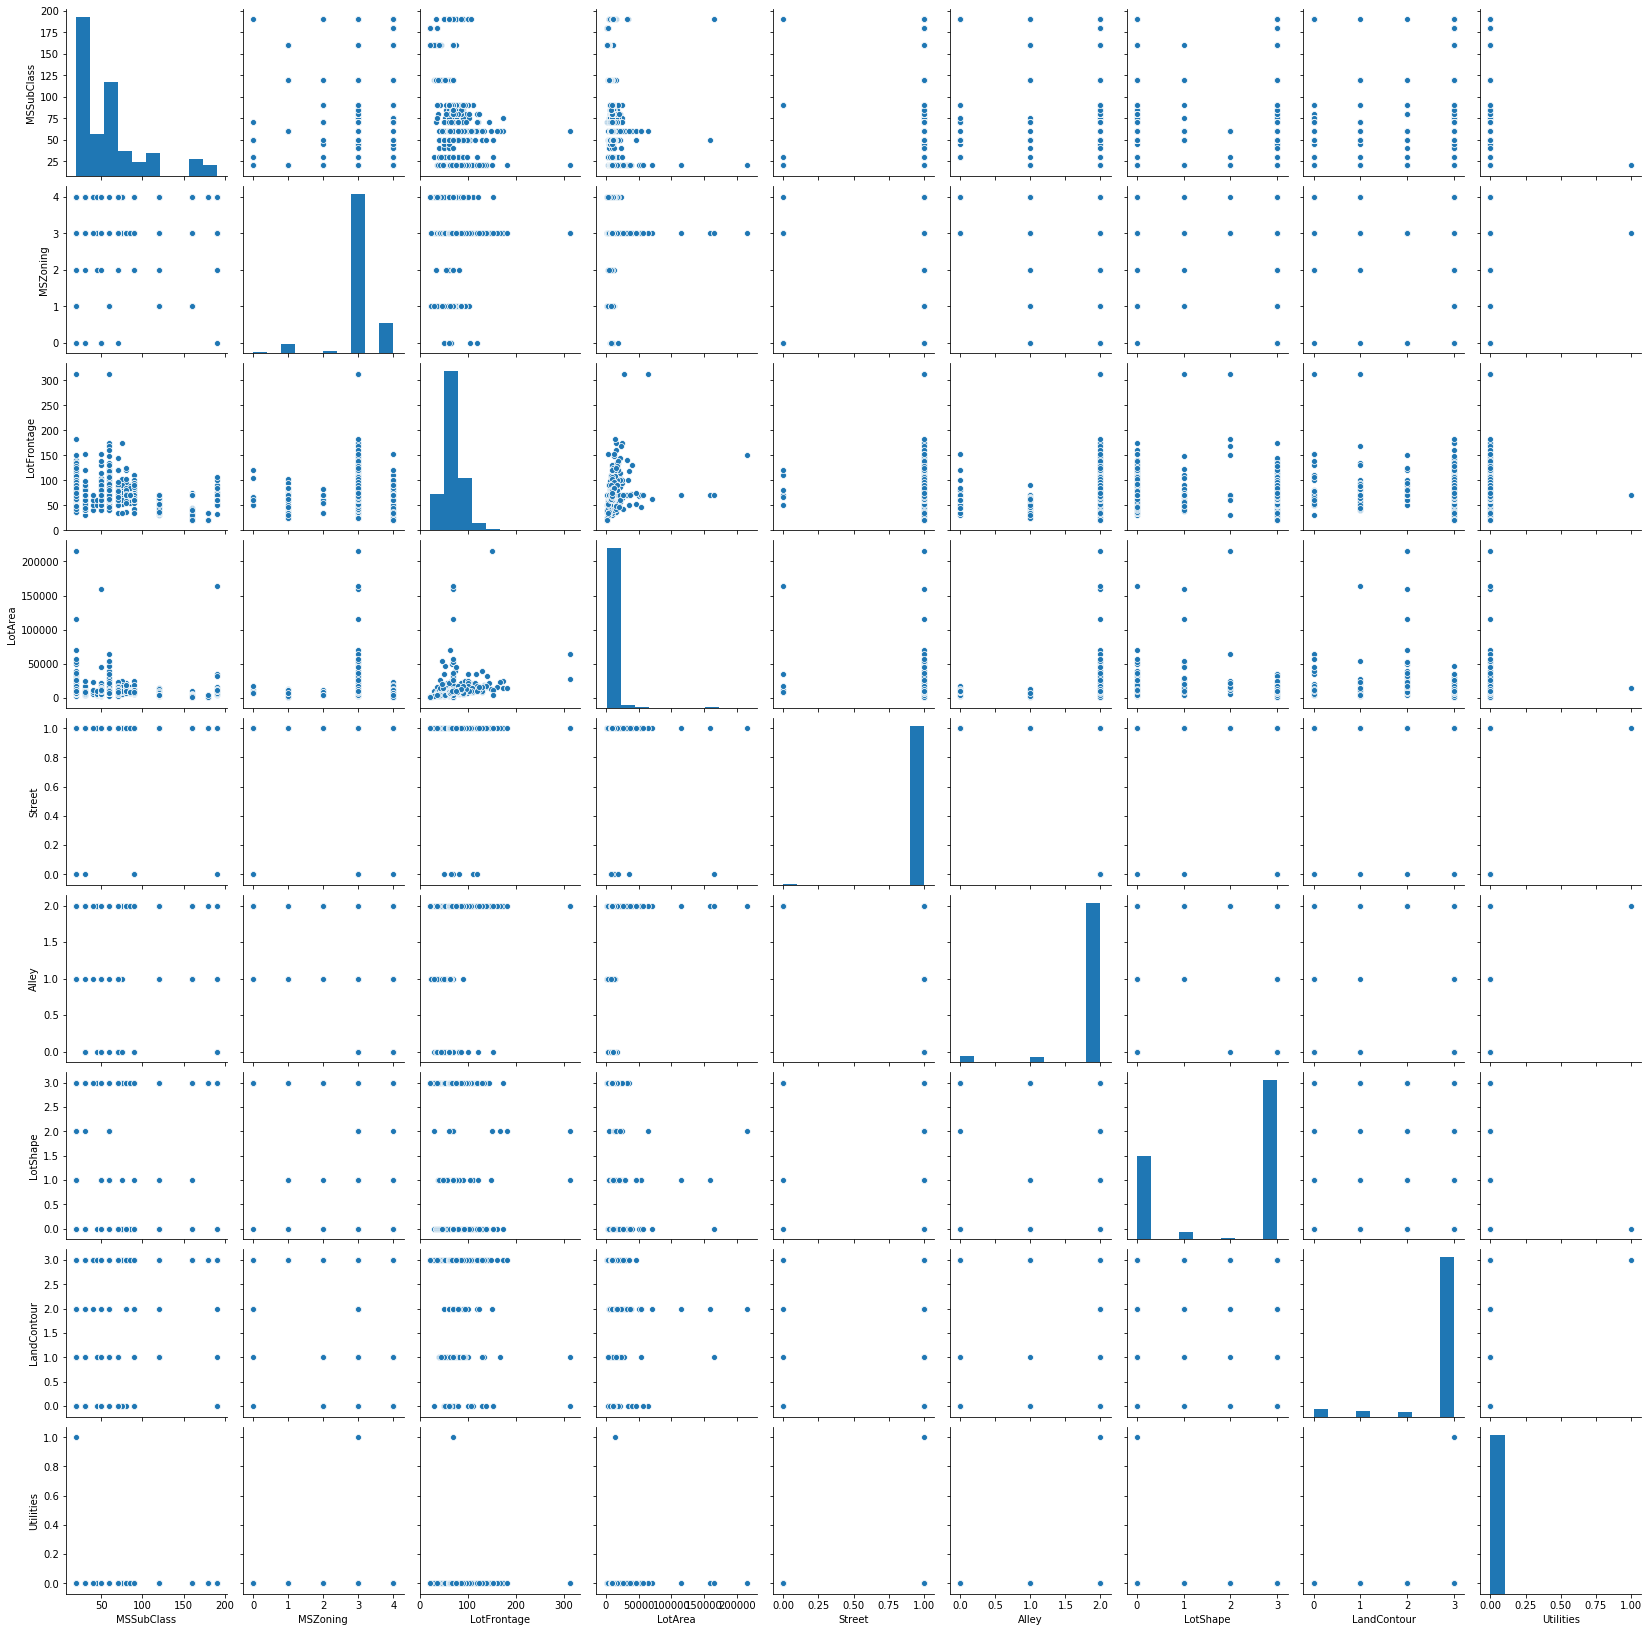

In [124]:
sns.pairplot(df[list(df.columns.tolist()[1:10])])

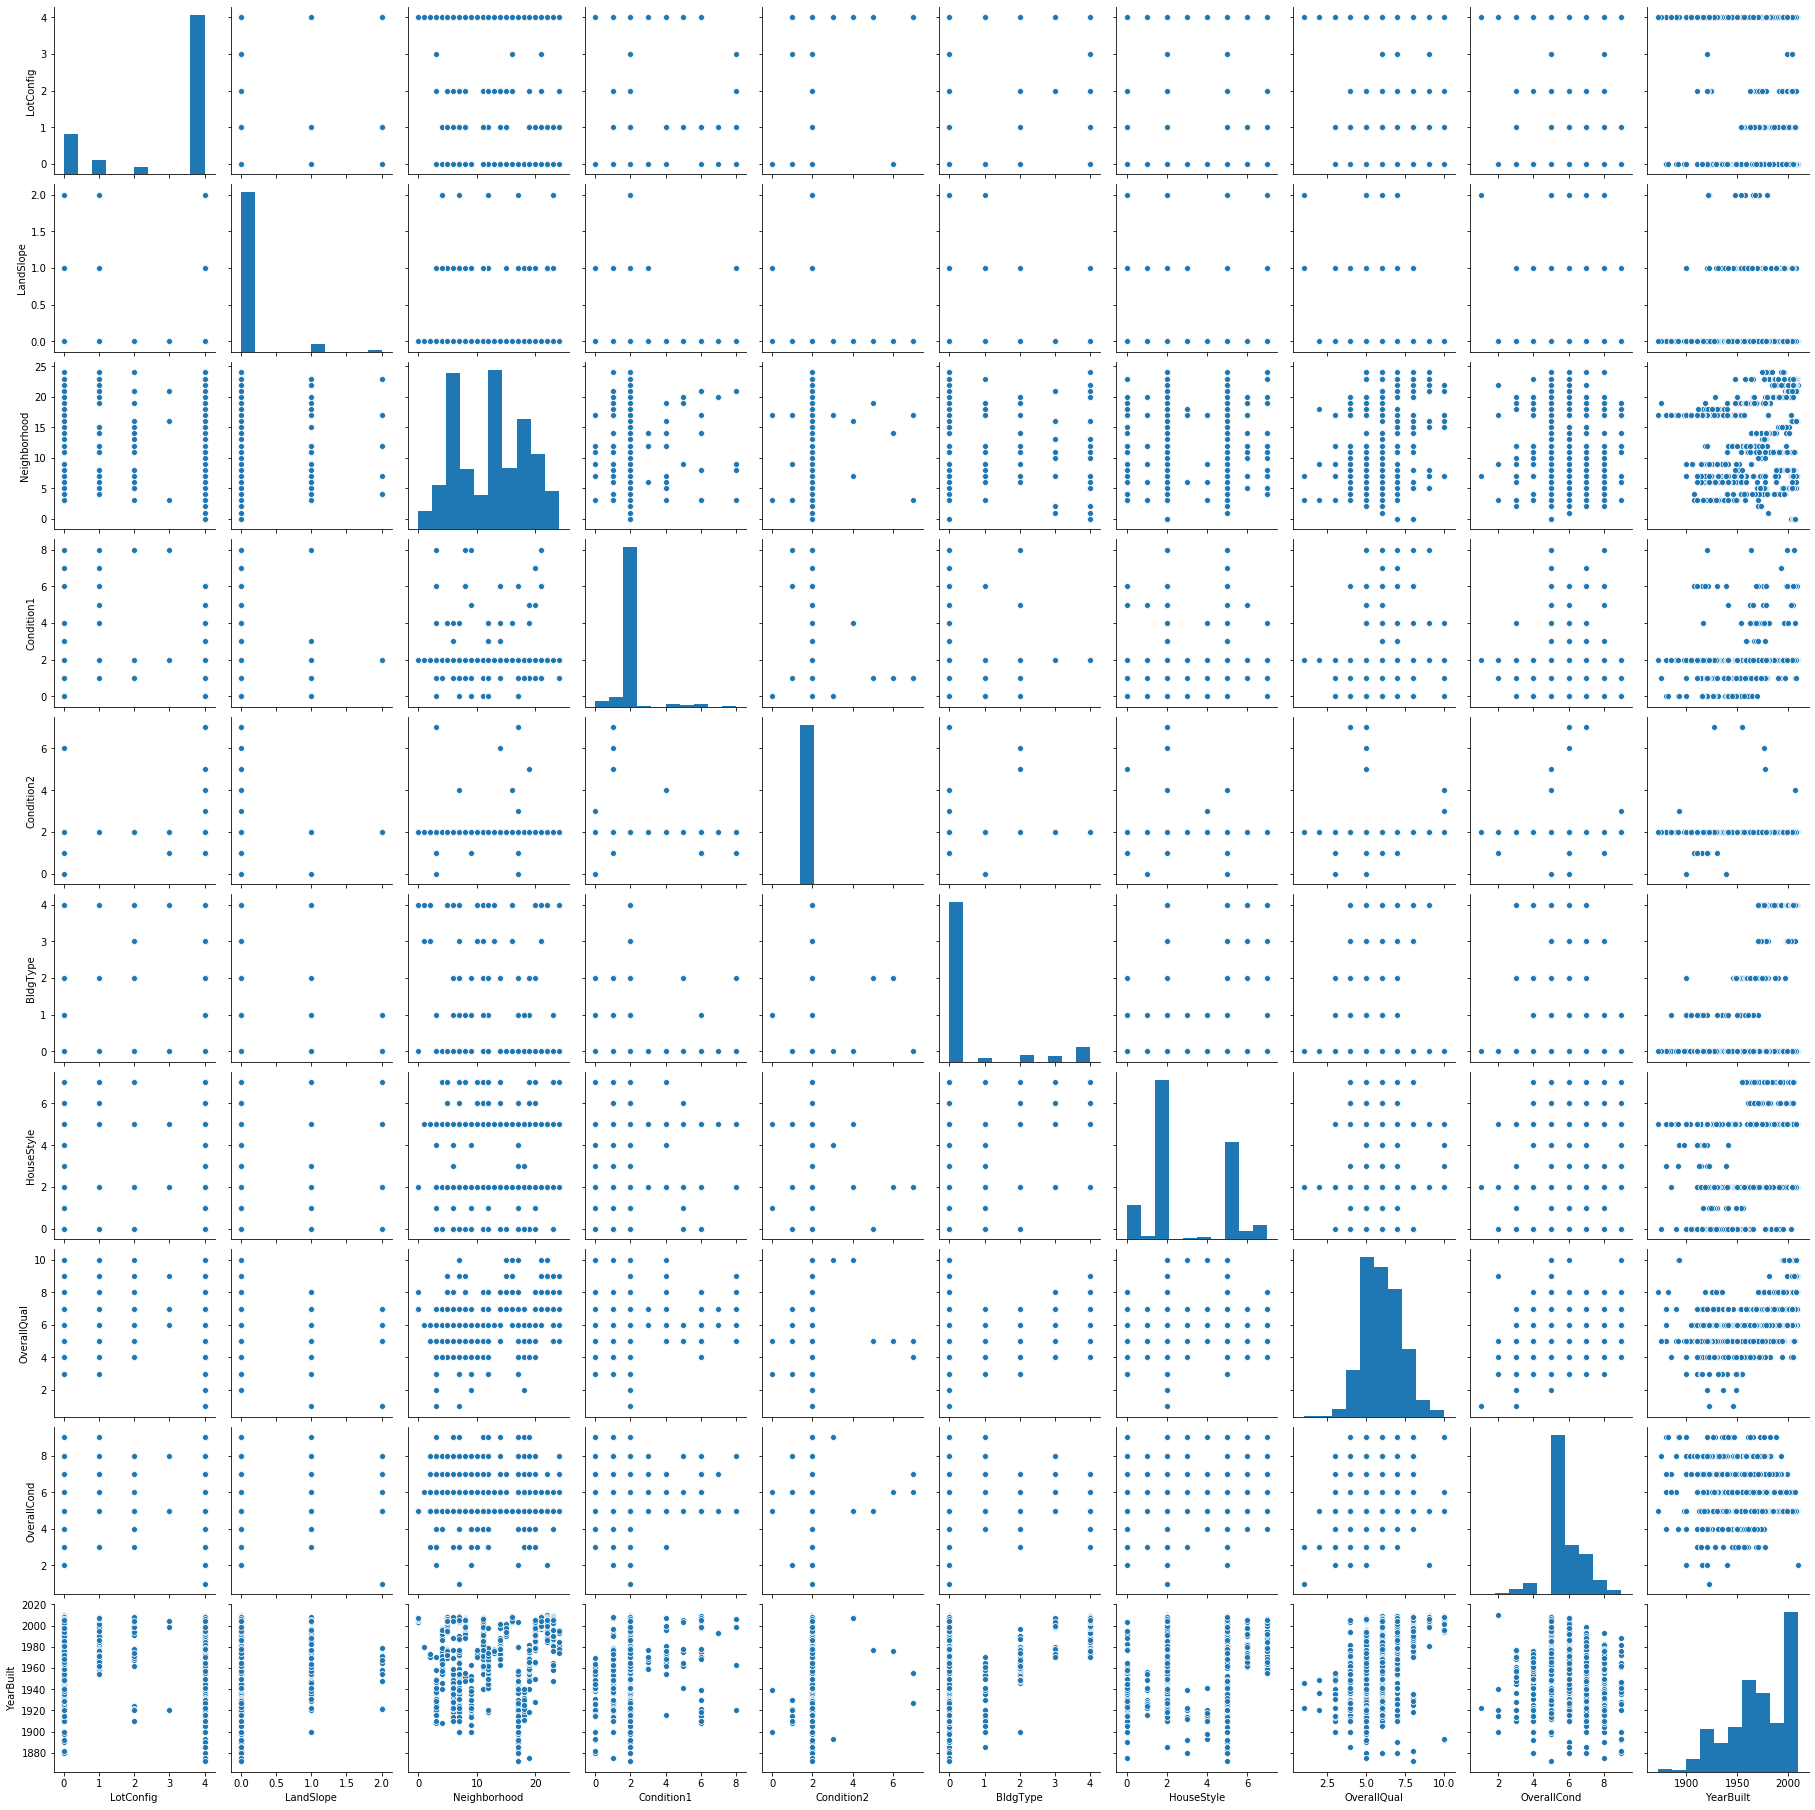

In [125]:
sns.pairplot(df[list(df.columns.tolist()[10:20])])

In [131]:
clf = DecisionTreeRegressor( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [132]:
clf.score(x_test,y_test)

0.7657848651700521

In [169]:
rand_clf = RandomForestRegressor(random_state=6)

In [170]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [171]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [172]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [173]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=6,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [174]:
grid_search.best_score_

0.8513441794121706

In [175]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [176]:
rand_clf = RandomForestRegressor(max_depth = 9,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 2,
 n_estimators = 130,random_state=43)

In [177]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

In [462]:
rand_clf.score(x_test,y_test)

0.8387122310530585

In [463]:
y_pred = rand_clf.predict(x_train)
mean_squared_log_error(y_train, y_pred)

0.009583909885853694

In [184]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [185]:
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [264]:
scaler=StandardScaler()
scaled_data_x=scaler.fit_transform(x)

In [265]:
scaled_data_y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [470]:
train_x,test_x,train_y,test_y=train_test_split(scaled_data_x,scaled_data_y,test_size=0.3,random_state=42)

In [284]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [288]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(3,7,1),
    'min_child_weight' : range(1,5,1),
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    "random_state" : [43,100,120,990]
}

In [289]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
   

In [291]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 115,
 'random_state': 43}

In [471]:
model = XGBRegressor(objective='reg:squarederror', learning_rate= 0.1,
 max_depth= 5,
 min_child_weight= 1,
 n_estimators=115,
 random_state=43)
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=115, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=43, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [472]:
# cheking training accuracy
y_pred = model.predict(train_x)
mean_squared_log_error(train_y, y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [297]:
y_pred

array([180319.53, 140988.55, 211605.62, ..., 121271.13, 172264.61,
       187559.94], dtype=float32)

In [473]:
model.score(test_x,test_y)

0.9152723922733845

In [296]:
filename = 'xgboost_model.pickle'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [437]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [438]:
df_test.drop(["Id"],axis=1,inplace=True)

In [439]:
df_test['LotFrontage'].replace(np.nan,np.round(df_test['LotFrontage'].mean()),inplace=True)
df_test['MasVnrType'].fillna(df_test['MasVnrType'].value_counts().index[0],inplace=True)
df_test['MasVnrArea'].fillna(np.round(df_test['MasVnrArea'].mean()),inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].value_counts().index[0],inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].value_counts().index[0],inplace=True)
df_test['BsmtFinSF1'].fillna(np.round(df_test['BsmtFinSF1'].mean()),inplace=True)
df_test["BsmtFinSF2"].fillna(df_test['BsmtFinSF2'].value_counts().index[0],inplace=True)
df_test["BsmtUnfSF"].fillna(df_test['BsmtUnfSF'].value_counts().index[0],inplace=True)
df_test["TotalBsmtSF"].fillna(df_test['TotalBsmtSF'].value_counts().index[0],inplace=True)
df_test["BsmtFullBath"].fillna(df_test['BsmtFullBath'].value_counts().index[0],inplace=True)
df_test["BsmtHalfBath"].fillna(df_test['BsmtHalfBath'].value_counts().index[0],inplace=True)
df_test["GarageCars"].fillna(df_test['GarageCars'].value_counts().index[0],inplace=True)
df_test["GarageArea"].fillna(df_test['GarageArea'].value_counts().index[0],inplace=True)

In [440]:
for x in range(len(df_test.isnull().any())):
    if df_test.isnull().any()[x] == True:
        print(df_test.isnull().any().index.tolist()[x])

MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [443]:
df_test.fillna("Zero",inplace=True)

In [447]:
o_list=[]
for x in df_test.columns.tolist():
    if df_test[x].dtype == "O":
        o_list.append(x)
        
print(o_list)

[]


In [445]:
try:
    for x in o_list:
        df_test[x] = LabelEncoder().fit_transform(df_test[x])
except:
    print(x)

In [446]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4


In [476]:
# cheking training accuracy
y_pred = model.predict(scaler.fit_transform(df_test))


In [477]:
pred_y = scaler.inverse_transform(y_pred)

ValueError: operands could not be broadcast together with shapes (1459,) (79,) (1459,) 

In [465]:
model.score(df_test,rand_clf.predict(df_test))

0.921438524100651

In [466]:
ans = rand_clf.predict(df_test)
ans

array([129247.00602759, 149524.97882418, 186807.66866086, ...,
       161973.5205936 , 121342.41677694, 233862.47494748])

In [467]:
final = {"Id": list(range(1461,2920)), "SalePrice": list(ans)}
df_ans = pd.DataFrame(final)
df_ans

,Id,SalePrice
0,1461,129247.006028
1,1462,149524.978824
2,1463,186807.668661
3,1464,188352.847816
4,1465,195529.089884
...,...,...
1454,2915,95299.225431
1455,2916,97216.246604
1456,2917,161973.520594
1457,2918,121342.416777


In [468]:
df_ans.to_csv('Final_submission_2.csv', index=False)

In [469]:
s = pd.read_csv("Final_submission_2.csv")
s

,Id,SalePrice
0,1461,129247.006028
1,1462,149524.978824
2,1463,186807.668661
3,1464,188352.847816
4,1465,195529.089884
...,...,...
1454,2915,95299.225431
1455,2916,97216.246604
1456,2917,161973.520594
1457,2918,121342.416777
